# Machine Learning Models

In [19]:
# Import the modules
import pandas as pd
from pathlib import Path

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler



import warnings
warnings.filterwarnings('ignore')

---

In [20]:
# read CSV
encoded_df = pd.read_csv(Path("encoded_data.csv"))

In [21]:
encoded_df

,Unnamed: 0,closing_date,payment.quantity,Rarity,Background_Baby Pink,Background_Backwards Hat Blue,Background_Beige,Background_Blue,Background_Bow Tie Blue,Background_Bucket Hat Tan,...,Body_Suit Red,Body_Surfboard Necklace,Body_Swordman,Body_Tank Top Blue,Body_Top Hat,Body_Tribal Necklace,Body_Turtleneck Blue,Body_Turtleneck Pink,Body_Viking Helmet,Body_Villain Mask
0,0,1713053207,1.120000e+19,8741.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1714367927,1.191000e+19,6938.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1714226351,1.176000e+19,7702.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1714200911,1.188000e+19,7702.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1714144895,1.201000e+19,7702.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1349,1714672115,1.130000e+19,5014.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1350,1350,1713162587,1.009000e+19,3235.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1351,1351,1713142367,1.036000e+19,3235.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1352,1352,1713139775,1.075000e+19,3235.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
print(encoded_df.columns)

Index(['Unnamed: 0', 'closing_date', 'payment.quantity', 'Rarity',
       'Background_Baby Pink', 'Background_Backwards Hat Blue',
       'Background_Beige', 'Background_Blue', 'Background_Bow Tie Blue',
       'Background_Bucket Hat Tan',
       ...
       'Body_Suit Red', 'Body_Surfboard Necklace', 'Body_Swordman',
       'Body_Tank Top Blue', 'Body_Top Hat', 'Body_Tribal Necklace',
       'Body_Turtleneck Blue', 'Body_Turtleneck Pink', 'Body_Viking Helmet',
       'Body_Villain Mask'],
      dtype='object', length=311)


## Splitting into Dependent and Independent Variables (Target and Features)

In [23]:
# Output variable
y = encoded_df['payment.quantity']

# Specify Input and Output Attributes
X = encoded_df.drop(columns=["Unnamed: 0", "closing_date", "payment.quantity", "Rarity"], axis=1)

In [24]:
X

,Background_Baby Pink,Background_Backwards Hat Blue,Background_Beige,Background_Blue,Background_Bow Tie Blue,Background_Bucket Hat Tan,Background_Cute,Background_Dark Gray,Background_Durag Blue,Background_Fish Lover,...,Body_Suit Red,Body_Surfboard Necklace,Body_Swordman,Body_Tank Top Blue,Body_Top Hat,Body_Tribal Necklace,Body_Turtleneck Blue,Body_Turtleneck Pink,Body_Viking Helmet,Body_Villain Mask
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# convert Wei to Eth
y = y / 1e18

y

0       11.20
1       11.91
2       11.76
3       11.88
4       12.01
        ...  
1349    11.30
1350    10.09
1351    10.36
1352    10.75
1353    10.67
Name: payment.quantity, Length: 1354, dtype: float64

## Train-Test Split

In [26]:
# Splitting the Data Using train_test_split
# Assigning a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [27]:
X_train.sample(10)

,Background_Baby Pink,Background_Backwards Hat Blue,Background_Beige,Background_Blue,Background_Bow Tie Blue,Background_Bucket Hat Tan,Background_Cute,Background_Dark Gray,Background_Durag Blue,Background_Fish Lover,...,Body_Suit Red,Body_Surfboard Necklace,Body_Swordman,Body_Tank Top Blue,Body_Top Hat,Body_Tribal Necklace,Body_Turtleneck Blue,Body_Turtleneck Pink,Body_Viking Helmet,Body_Villain Mask
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scale Data

In [28]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Linear Regression Model

## Linear Regression

In [29]:
# Instantiating the Linear Regression model
linear_regression_model = LinearRegression()

# Fitting the model using training data
# Linear Regression is used for continuous outcomes, ensure y_train is continuous
linear_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the training data
pred_linear_reg_continuous = linear_regression_model.predict(X_train_scaled)

## Making Predictions Using Training Data

In [30]:
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, pred_linear_reg_continuous)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_train, pred_linear_reg_continuous)

# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculating R^2 Score
r2 = r2_score(y_train, pred_linear_reg_continuous)

# Display evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Mean Absolute Error (MAE): 0.4408201293124824
Mean Squared Error (MSE): 0.49823816164858037
Root Mean Squared Error (RMSE): 0.7058598739470748
R-squared (R²) Score: 0.6783851901728112


Mean Absolute Error (MAE): The MAE is a measure of the average absolute errors between the true values and the predicted values. It tells you how close, on average, the predictions are to the true values. In this case, the MAE is approximately 0.38941010293125566.

Mean Squared Error (MSE): The MSE is a measure of the average squared errors between the true values and the predicted values. It penalizes larger errors more heavily than smaller ones. In this case, the MSE is approximately 0.5013629934572486.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. It provides an interpretable measure of the average magnitude of error in the same units as the target variable. In this case, the RMSE is approximately 0.708069907182369.

R-squared (R²) Score: The R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit of the model to the data. In this case, the R² score is 0.6909513484448644, which indicates a good fit of the model to the data.

**This means that traits strongly predict price.**

Overall, these metrics provide insights into how well the linear regression model is performing in terms of prediction accuracy and model fit. A lower MAE, MSE, and RMSE, and a higher R² score indicate better performance of the model.

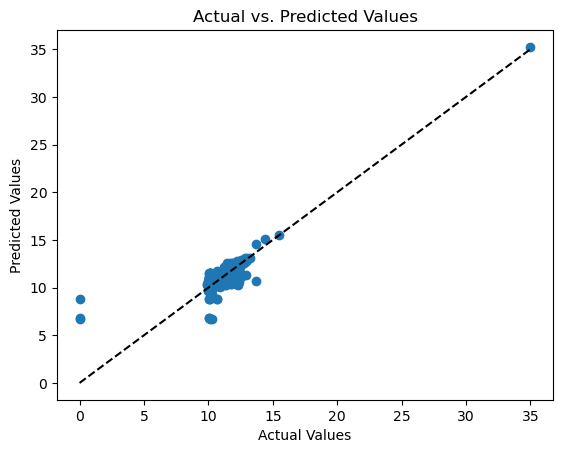

In [34]:
train_plot = plt.scatter(y_train, pred_linear_reg_continuous)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

train_plot

## Evaluating Model Performance: Accuracy Score, Confusion Matrix, and Classification Report

In [31]:
# Predicting on the Test Set using Linear Regression
y_prediction = linear_regression_model.predict(X_test_scaled)

## Making Predictions Using Testing Data

### Evaluating the model's ability to predict price, based on traits.

In [35]:
# Compute the metrics for the linear regression model
score = linear_regression_model.score(X_test_scaled,y_test,sample_weight=None)
r2 = r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
std=np.std(y_prediction)


# Print relevant metrics.
display(score, r2, mse, rmse, std)

-9.287716712542562e+26

-9.287716712542562e+26

6.84762844403113e+26

26167973639605.973

26129284105135.68

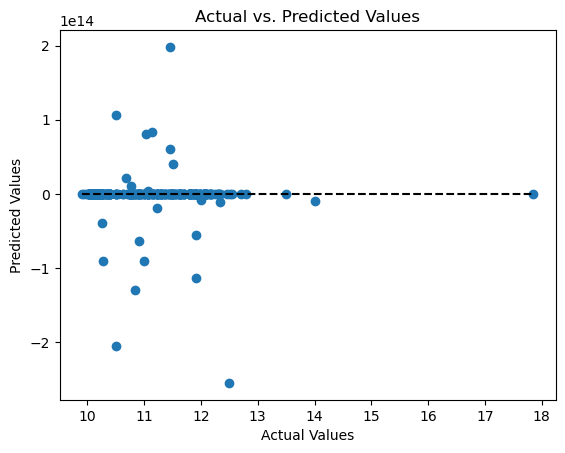

In [36]:
test_plot = plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

train_plot